This notebook, written by E. Karlé, contains the code necessary to reproduce Figures 1 to 5, C.1 and C.2 from the article Dynamic Ranking and Translation Synchronization https://arxiv.org/pdf/2207.01455.pdf

The notebook contain toy examples to give the user a feel of the methods and algorithms. To reproduce the figures of the paper, one has to comment/uncomment the corresponding set of parameters in the 'Parameters' cell in each section.

In [1]:
import os
import random
import matplotlib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy
import pickle

import sys
sys.path.append('python')
sys.path.append('python/modules')

In [2]:
plt.rcParams.update({'font.size': 16})

This notebook is constructed such that each subsection (corresponding to each figure) can be executed independently.

# Figure 1 : TranSync analysis for different smoothness

This code plots the MSE versus T for DLS and DProj when the data is generated according to the Dynamic TranSync model for $N = 100$ and graphs are generated as $\mathcal{G}(n, p(t))$ with $p(t)$ chosen randomly between $\frac{1}{n}$ and $\frac{\log(n)}{n}$. The results are averaged over the grid $\mathcal{T}$ as well as 40 Monte Carlo runs.

In [2]:
from transync import transync_analysis

mle
graph
simu


In [4]:
# Parameters

# Toy example
N = 30 # Number of items
list_T = [10,20,30,40,50] # Number of time points
B = 15 # Number of Monte Carlo runs

## Parameters of the paper (uncomment this section to reproduce the figure of the paper)
#N = 100 # Number of items
#list_T = [10,30,50,70,100,130,150,170,200] # Number of time points
#B = 40 # Number of Monte Carlo runs

# Connectivity of graphs is chosen randomly between p1/N and p2/N 
p1 = 1 
p2 = np.log(N)

# Estimation method to use
ls_flag = False # Naive LS method
dls_flag = True # Dynamic LS method
dproj_flag = True # Dynamic Projection method

We call the transync_analysis function for different values of $\alpha$, where $S_T = \frac{1}{T^\alpha}$ and plot the results.

## $S_T = \frac{1}{T}$

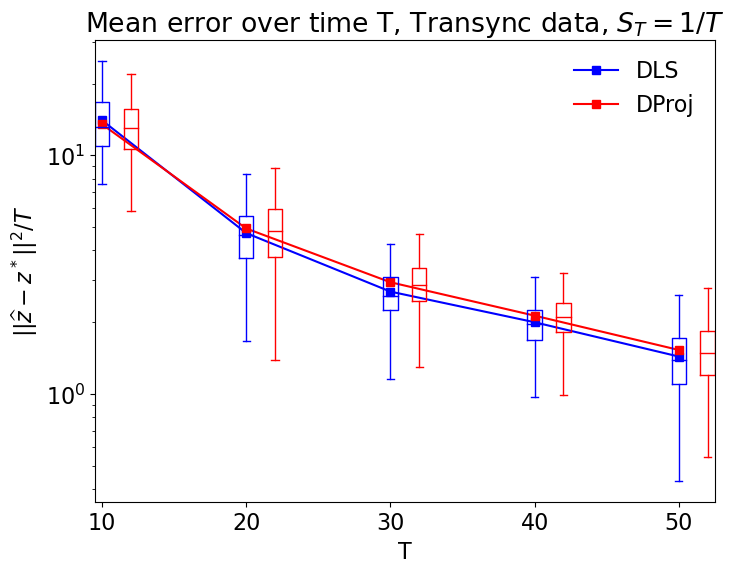

CPU times: user 1min 50s, sys: 4.73 s, total: 1min 55s
Wall time: 45.4 s


In [5]:
%%time

# Analysis with alpha = 1
MSE_ls_1,MSE_dls_1,MSE_dproj_1,data_ls_1,data_dls_1,data_dproj_1 = transync_analysis(N,list_T,B,1,p1,p2,ls_flag,dls_flag,dproj_flag)

# Plot
fig, ax = plt.subplots(1, figsize=(8, 6))

# MSE
ax.plot(list_T, MSE_dls_1,marker='s',label = "DLS",color='blue')
ax.plot(list_T, MSE_dproj_1,marker='s',label = "DProj",color='red')

# Boxplot
box_dls_1 = ax.boxplot(data_dls_1,showfliers=False,positions=[t for t in list_T],widths = 1)
box_dproj_1 = ax.boxplot(data_dproj_1,showfliers=False,positions=[t+2 for t in list_T],widths = 1)

for _, line_list in box_dls_1.items(): 
    for line in line_list: 
        line.set_color('blue') 
        
for _, line_list in box_dproj_1.items(): 
    for line in line_list: 
        line.set_color('red') 

ax.set_xticks(list_T)
ax.set_yscale('log')
ax.set_xlabel('T')
ax.set_ylabel('$\| \|\widehat{z} - z^*\|\|^2/T$')
        
# Add a legend, and position it on the lower right (with no box)
plt.legend(loc="upper right", frameon=False)
plt.title('Mean error over time T, Transync data, $S_T = 1/T$')
plt.show()

## $S_T = \frac{1}{\sqrt{T}}$

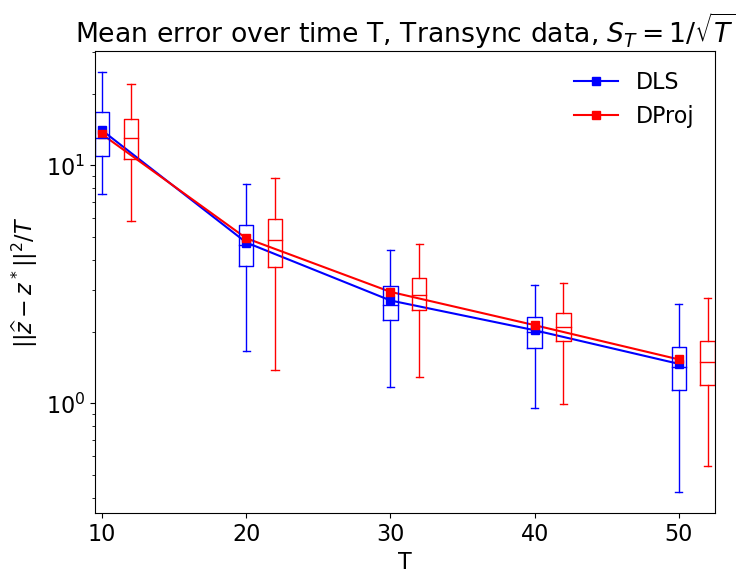

CPU times: user 2min 10s, sys: 5.68 s, total: 2min 15s
Wall time: 46.3 s


In [7]:
%%time

# Analysis with alpha = 0.5
MSE_ls_05,MSE_dls_05,MSE_dproj_05,data_ls_05,data_dls_05,data_dproj_05 = transync_analysis(N,list_T,B,0.5,p1,p2,ls_flag,dls_flag,dproj_flag)

# Plot
fig, ax = plt.subplots(1, figsize=(8, 6))

# MSE
ax.plot(list_T, MSE_dls_05,marker='s',label = "DLS",color='blue')
ax.plot(list_T, MSE_dproj_05,marker='s',label = "DProj",color='red')

# Boxplot
box_dls_05 = ax.boxplot(data_dls_05,showfliers=False,positions=[t for t in list_T],widths = 1)
box_dproj_05 = ax.boxplot(data_dproj_05,showfliers=False,positions=[t+2 for t in list_T],widths = 1)

for _, line_list in box_dls_05.items(): 
    for line in line_list: 
        line.set_color('blue') 
        
for _, line_list in box_dproj_05.items(): 
    for line in line_list: 
        line.set_color('red') 

ax.set_xticks(list_T)
ax.set_yscale('log')
ax.set_xlabel('T')
ax.set_ylabel('$\| \|\widehat{z} - z^*\|\|^2/T$')
        
# Add a legend, and position it on the lower right (with no box)
plt.legend(loc="upper right", frameon=False)
plt.title('Mean error over time T, Transync data, $S_T = 1/\sqrt{T}$')
plt.show()

## $S_T = 1$

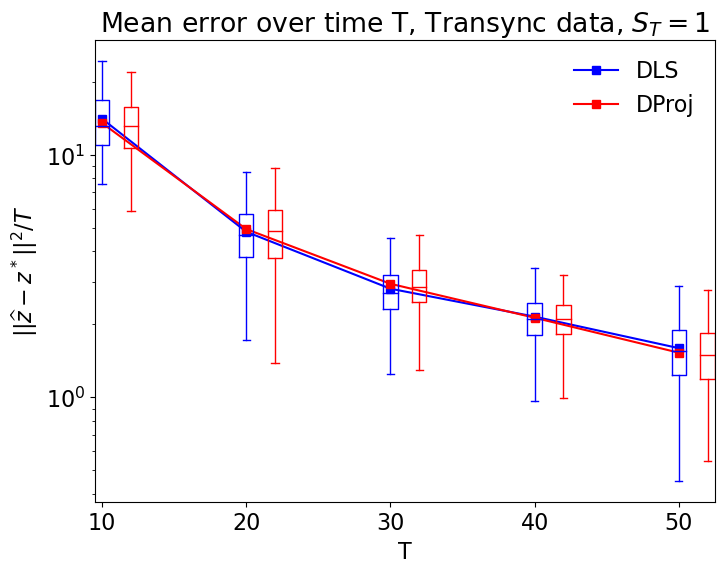

CPU times: user 2min 4s, sys: 6.42 s, total: 2min 11s
Wall time: 41.3 s


In [8]:
%%time

# Analysis with alpha = 0
MSE_ls_0,MSE_dls_0,MSE_dproj_0,data_ls_0,data_dls_0,data_dproj_0 = transync_analysis(N,list_T,B,0,p1,p2,ls_flag,dls_flag,dproj_flag)

# Plot
fig, ax = plt.subplots(1, figsize=(8, 6))

# MSE
ax.plot(list_T, MSE_dls_0,marker='s',label = "DLS",color='blue')
ax.plot(list_T, MSE_dproj_0,marker='s',label = "DProj",color='red')

# Boxplot
box_dls_0 = ax.boxplot(data_dls_0,showfliers=False,positions=[t for t in list_T],widths = 1)
box_dproj_0 = ax.boxplot(data_dproj_0,showfliers=False,positions=[t+2 for t in list_T],widths = 1)

for _, line_list in box_dls_0.items(): 
    for line in line_list: 
        line.set_color('blue') 
        
for _, line_list in box_dproj_0.items(): 
    for line in line_list: 
        line.set_color('red') 

ax.set_xticks(list_T)
ax.set_yscale('log')
ax.set_xlabel('T')
ax.set_ylabel('$\| \|\widehat{z} - z^*\|\|^2/T$')
        
# Add a legend, and position it on the lower right (with no box)
plt.legend(loc="upper right", frameon=False)
plt.title('Mean error over time T, Transync data, $S_T = 1$')
plt.show()

## $S_T = \sqrt{T}$

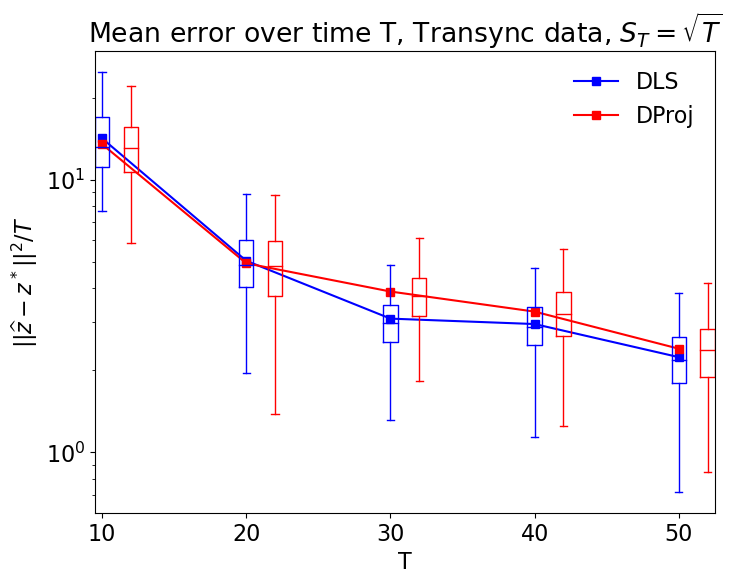

CPU times: user 1min 57s, sys: 5.69 s, total: 2min 2s
Wall time: 30.5 s


In [9]:
%%time

# Analysis with alpha = -0.5
MSE_ls_m05,MSE_dls_m05,MSE_dproj_m05,data_ls_m05,data_dls_m05,data_dproj_m05 = transync_analysis(N,list_T,B,-0.5,p1,p2,ls_flag,dls_flag,dproj_flag)

# Plot
fig, ax = plt.subplots(1, figsize=(8, 6))

# MSE
ax.plot(list_T, MSE_dls_m05,marker='s',label = "DLS",color='blue')
ax.plot(list_T, MSE_dproj_m05,marker='s',label = "DProj",color='red')

# Boxplot
box_dls_m05 = ax.boxplot(data_dls_m05,showfliers=False,positions=[t for t in list_T],widths = 1)
box_dproj_m05 = ax.boxplot(data_dproj_m05,showfliers=False,positions=[t+2 for t in list_T],widths = 1)

for _, line_list in box_dls_m05.items(): 
    for line in line_list: 
        line.set_color('blue') 
        
for _, line_list in box_dproj_m05.items(): 
    for line in line_list: 
        line.set_color('red') 

ax.set_xticks(list_T)
ax.set_yscale('log')
ax.set_xlabel('T')
ax.set_ylabel('$\| \|\widehat{z} - z^*\|\|^2/T$')
        
# Add a legend, and position it on the lower right (with no box)
plt.legend(loc="upper right", frameon=False)
plt.title('Mean error over time T, Transync data, $S_T = \sqrt{T}$')
plt.show()

# Figure 2 : Analysis on BTL data for different smoothness

This code plots the MSE versus T for DLS, DProj, DRC and MLE when the data is generated according to the BTL model for $N = 100$, and graphs are $\mathcal{G}(n, p(t))$ with $p(t)$ chosen randomly between $\frac{1}{n}$ and $\frac{\log(n)}{n}$. The results are averaged over the grid $\mathcal{T}$ as well as 40 Monte Carlo runs.

In [10]:
from btl_analysis import btl

In [11]:
# Parameters

# Toy example
N = 30 # Number of items
list_T = [10,20,30,40,50] # Number of time points
B = 15 # Number of Monte Carlo runs

## Parameters of the paper (uncomment this section to reproduce the figure of the paper)
#N = 100 # Number of items
#list_T = [10,30,50,70,100,130,150,170,200] # Number of time points
#B = 40 #  Number of MC runs

L = 10 # Number of observations for each pair of item in the BTL model
c_delta = 0.5 # parameter for the neighborhood size in the DRC method

# Connectivity of graphs is chosen randomly between p1/N and p2/N 
p1 = 1 
p2 = np.log(N)

# Estimation method to use
dls_flag = True # Dynamic Least Squares method
dproj_flag = True # Dynamic Projection method
drc_flag = True # Dynamic Rank Centrality method
mle_flag = True # Maximum Likelihood method

We call the function btl which runs the methods DLS, Dproj, DRC and MLE on data generated according to the BTL model for different values of smoothness.

## $S_T = \frac{1}{T}$

/Users/eglantine.karle/Docs/GitHub/Dynamic_TranSync/btl_analysis.py:165: ComplexWarning: Casting complex values to real discards the imaginary part
  z_drc[i,b,:] = np.log(drc.RC_dyn(t,Y,A,vec_delta[i],tol = 1e-12))


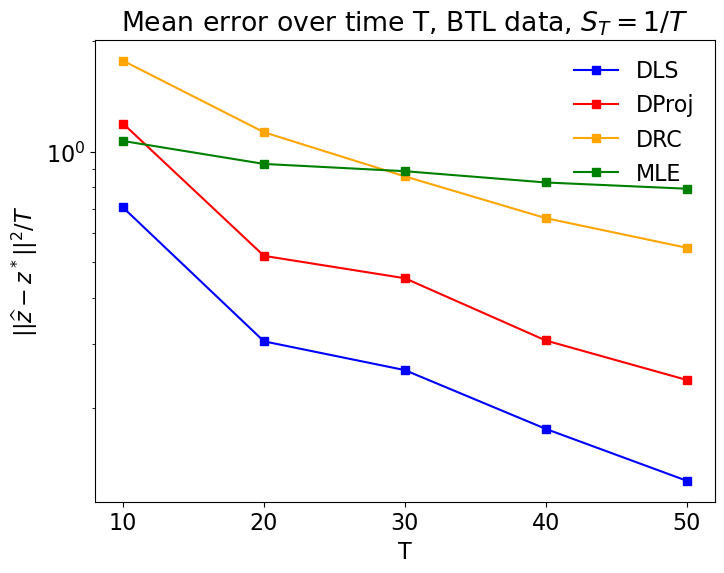

CPU times: user 5min 46s, sys: 10.9 s, total: 5min 57s
Wall time: 3min 5s


In [12]:
%%time

# alpha = 1
MSE_dls_1,MSE_dproj_1,MSE_drc_1,MSE_mle_1 = btl(N,list_T,B,1,p1,p2,L,c_delta,dls_flag,dproj_flag,drc_flag,mle_flag)

# Plot
fig, ax = plt.subplots(1, figsize=(8, 6))

ax.plot(list_T, MSE_dls_1,marker='s',label = "DLS",color='blue')
ax.plot(list_T, MSE_dproj_1,marker='s',label = "DProj",color='red')
ax.plot(list_T, MSE_drc_1,marker='s',label = "DRC",color='orange')
ax.plot(list_T, MSE_mle_1,marker='s',label = "MLE",color='green')

ax.set_xticks(list_T)
ax.set_yscale('log')
ax.set_xlabel('T')
ax.set_ylabel('$\| \|\widehat{z} - z^*\|\|^2/T$')
        
# Add a legend, and position it on the lower right (with no box)
plt.legend(loc="upper right", frameon=False)
plt.title('Mean error over time T, BTL data, $S_T = 1/T$')
plt.show()


## $S_T = \frac{1}{\sqrt{T}}$

/Users/eglantine.karle/Docs/GitHub/Dynamic_TranSync/btl_analysis.py:165: ComplexWarning: Casting complex values to real discards the imaginary part
  z_drc[i,b,:] = np.log(drc.RC_dyn(t,Y,A,vec_delta[i],tol = 1e-12))


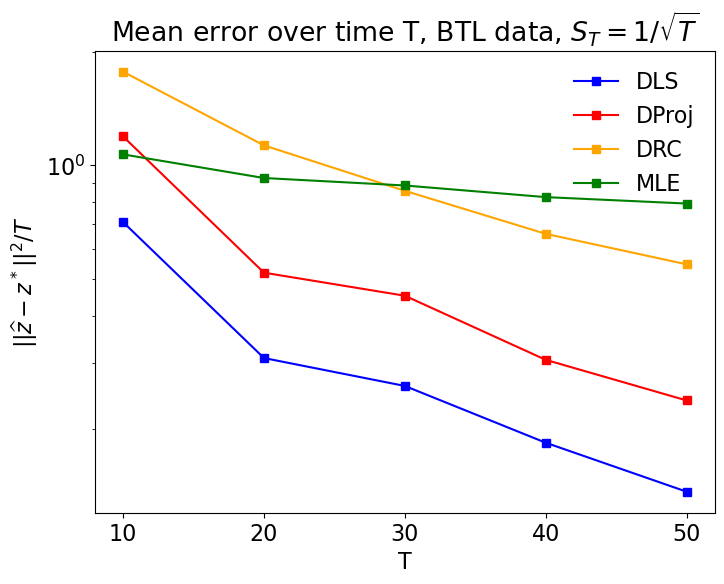

CPU times: user 6min 6s, sys: 7.17 s, total: 6min 13s
Wall time: 2min 58s


In [13]:
%%time

# Analysis with alpha = 0.5
MSE_dls_05,MSE_dproj_05,MSE_drc_05,MSE_mle_05 = btl(N,list_T,B,0.5,p1,p2,L,c_delta,dls_flag,dproj_flag,drc_flag,mle_flag)

# Plot
fig, ax = plt.subplots(1, figsize=(8, 6))

ax.plot(list_T, MSE_dls_05,marker='s',label = "DLS",color='blue')
ax.plot(list_T, MSE_dproj_05,marker='s',label = "DProj",color='red')
ax.plot(list_T, MSE_drc_05,marker='s',label = "DRC",color='orange')
ax.plot(list_T, MSE_mle_05,marker='s',label = "MLE",color='green')

ax.set_xticks(list_T)
ax.set_yscale('log')
ax.set_xlabel('T')
ax.set_ylabel('$\| \|\widehat{z} - z^*\|\|^2/T$')
        
# Add a legend, and position it on the lower right (with no box)
plt.legend(loc="upper right", frameon=False)
plt.title('Mean error over time T, BTL data, $S_T = 1/\sqrt{T}$')
plt.show()


# Figure 3 : Comparison of TranSync analysis with naive LS

This code plots the evolution of estimation errors with T for Least-Squares, DLS and DProj method when the synthetic data are generated according to the Dynamic TranSync model for $N = 100$ and the graphs are generated as $\mathcal{G}(n, p(t))$ with $p(t) =\frac{log(n)}{n}$. In particular, we ensure that the individual graphs are all connected. The results are averaged over the grid $\mathcal{T}$ as well
as 20 Monte Carlo runs.

In [14]:
from transync import transync_analysis

In [15]:
# Parameters

# Toy example
N = 30 # Number of items
list_T = [10,20,30,40,50] # Number of time points
B = 15 # Number of Monte Carlo runs

## Parameters of the paper (uncomment this section to reproduce the figure of the paper)
#N = 100 # Number of items
#list_T = [10,30,50,70,100,130,150,170,200] # Number of time points
#B = 20 # Number of Monte Carlo runs

# Connectivity of graphs is chosen randomly between p1/N and p2/N : here we choose a connectivity of log(N)/N for all graphs
p1 = np.log(N) 
p2 = np.log(N)

# Estimation method to use
ls_flag = True # Naive Least Squares method
dls_flag = True # Dynamic Least Squares method
dproj_flag = True # Dynamic Projection method

We call the transync_analysis function for different values of $\alpha$, where $S_T = \frac{1}{T^\alpha}$ and plot the results.

## $S_T = \frac{1}{T}$

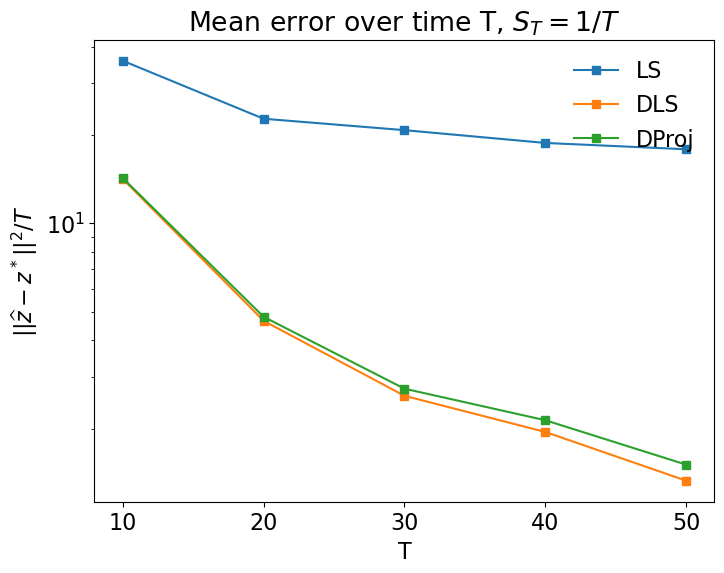

CPU times: user 2min 30s, sys: 2.48 s, total: 2min 33s
Wall time: 36.5 s


In [16]:
%%time

# Analysis with alpha = 1
MSE_ls_1,MSE_dls_1,MSE_dproj_1,_,_,_ = transync_analysis(N,list_T,B,1,p1,p2,ls_flag,dls_flag,dproj_flag)

# Plot
fig, ax = plt.subplots(1, figsize=(8, 6))

ax.plot(list_T, MSE_ls_1,marker='s',label = "LS")
ax.plot(list_T, MSE_dls_1,marker='s',label = "DLS")
ax.plot(list_T, MSE_dproj_1,marker='s',label = "DProj")

ax.set_xticks(list_T)
ax.set_yscale('log')
ax.set_xlabel('T')
ax.set_ylabel('$\| \|\widehat{z} - z^*\|\|^2/T$')
        
# Add a legend, and position it on the lower right (with no box)
plt.legend(loc="upper right", frameon=False)
plt.title('Mean error over time T, $S_T = 1/T$')
plt.show()


## $S_T = \sqrt{T}$

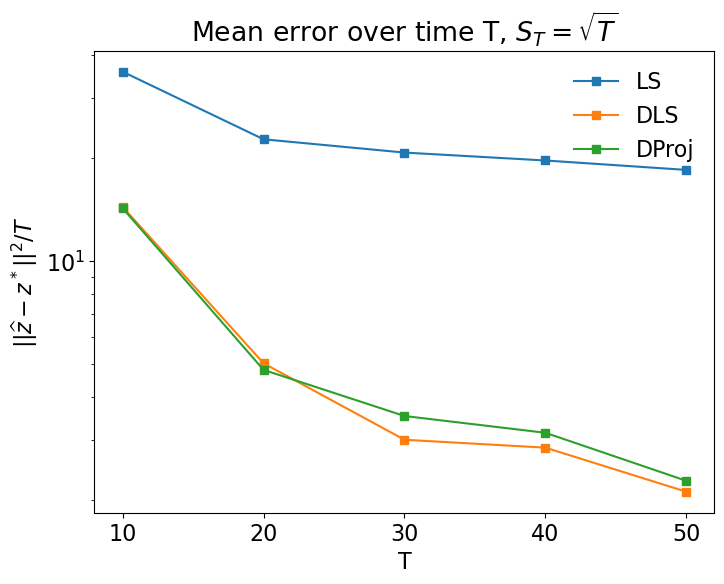

CPU times: user 2min 19s, sys: 2.79 s, total: 2min 22s
Wall time: 25.2 s


In [17]:
%%time

# Analysis with alpha = -0.5
MSE_ls_m05,MSE_dls_m05,MSE_dproj_m05,_,_,_ = transync_analysis(N,list_T,B,-0.5,p1,p2,ls_flag,dls_flag,dproj_flag)

# Initialise the figure and axes.
fig, ax = plt.subplots(1, figsize=(8, 6))

ax.plot(list_T, MSE_ls_m05,marker='s',label = "LS")
ax.plot(list_T, MSE_dls_m05,marker='s',label = "DLS")
ax.plot(list_T, MSE_dproj_m05,marker='s',label = "DProj")

ax.set_xticks(list_T)
ax.set_yscale('log')
ax.set_xlabel('T')
ax.set_ylabel('$\| \|\widehat{z} - z^*\|\|^2/T$')
        
# Add a legend, and position it on the lower right (with no box)
plt.legend(loc="upper right", frameon=False)
plt.title('Mean error over time T, $S_T = \sqrt{T}$')
plt.show()


# Figure 4 : TranSync analysis for different connectivity parameters

This code plots the evolution of estimation errors with T for DLS and DProj method when the synthetic data are generated according to the Dynamic TranSync model for $N = 100$ and the graphs are generated as $\mathcal{G}(n, p)$ for different choices of (constant) $p$. In particular, we ensure that the individual graphs are all connected. The results are averaged over the grid $\mathcal{T}$ as well as 20 Monte Carlo runs.

In [18]:
from transync import transync_analysis

In [19]:
# Parameters

# Toy example
N = 30 # Number of items
list_T = [10,20,30,40,50] # Number of timepoints
B = 15 # Number of Monte Carlo runs

## Parameters of the paper (uncomment this section to reproduce the figure of the paper)
#N = 100 # Number of items
#list_T = [10,30,50,70,100,130,150,170,200] # Number of timepoints
#B = 20 # Number of Monte Carlo runs

# Smoothness S_T = 1/T^{alpha}
alpha = 1

# Estimation method to use
ls_flag = False # Naive Least Squares method
dls_flag = True # Dynamic Least Squares method
dproj_flag = True # Dynamic Projection method

We call the transync_analysis function for different values of connectivity $p$.

In [20]:
%%time

# Analysis with p = 1/N
MSE_ls_1,MSE_dls_1,MSE_dproj_1,_,_,_ = transync_analysis(N,list_T,B,alpha,1,1,ls_flag,dls_flag,dproj_flag)

# Analysis with p = log(N)/N
MSE_ls_log,MSE_dls_log,MSE_dproj_log,_,_,_ = transync_analysis(N,list_T,B,alpha,np.log(N),np.log(N),ls_flag,dls_flag,dproj_flag)

# Analysis with p = 1/sqrt(N)
MSE_ls_sqrt,MSE_dls_sqrt,MSE_dproj_sqrt,_,_,_ = transync_analysis(N,list_T,B,alpha,np.sqrt(N),np.sqrt(N),ls_flag,dls_flag,dproj_flag)


CPU times: user 6min 22s, sys: 9.1 s, total: 6min 32s
Wall time: 1min 51s


## Plots of the error for DLS method for different connectivity $p$

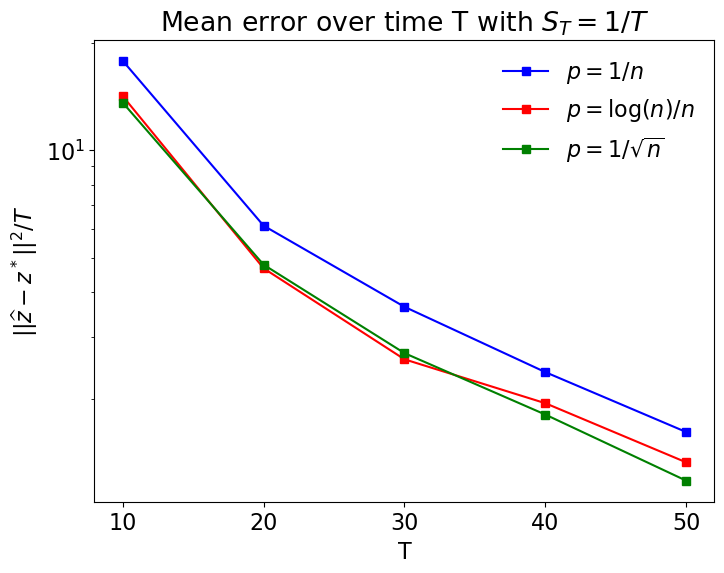

In [21]:
# DLS Method

fig, ax0 = plt.subplots(1, figsize=(8, 6))

# p = 1/n
ax0.plot(list_T, MSE_dls_1,marker='s',label = "$p=1/n$",color='blue')

# p =log(n)/n
ax0.plot(list_T, MSE_dls_log,marker='s',label = "$p=\log (n)/n$",color='red')

# p = 1/sqrt(n)
ax0.plot(list_T, MSE_dls_sqrt,marker='s',label = "$p=1/\sqrt{n}$",color='green')

ax0.set_xticks(list_T)
ax0.set_yscale('log')
ax0.set_xlabel('T')
ax0.set_ylabel('$\| \|\widehat{z} - z^*\|\|^2/T$')

# Add a legend, and position it on the lower right (with no box)
ax0.legend(loc="upper right", frameon=False)
plt.title('Mean error over time T with $S_T = 1/T$')
plt.show()


## Plots of the error for DProj method for different connectivity $p$

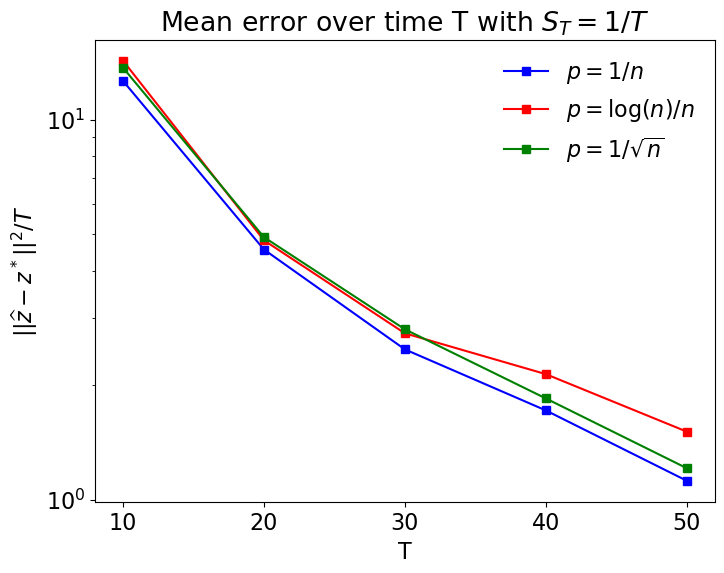

In [22]:
# DProj method

fig, ax1 = plt.subplots(1, figsize=(8, 6))

# p = 1/n
ax1.plot(list_T, MSE_dproj_1,marker='s',label = "$p=1/n$",color='blue')

# p =log(n)/n
ax1.plot(list_T, MSE_dproj_log,marker='s',label = "$p=\log (n)/n$",color='red')

# p = 1/\sqrt(n)
ax1.plot(list_T, MSE_dproj_sqrt,marker='s',label = "$p=1/\sqrt{n}$",color='green')

ax1.set_xticks(list_T)
ax1.set_yscale('log')
ax1.set_xlabel('T')
ax1.set_ylabel('$\| \|\widehat{z} - z^*\|\|^2/T$')

# Add a legend, and position it on the lower right (with no box)
ax1.legend(loc="upper right", frameon=False)
plt.title('Mean error over time T with $S_T = 1/T$')
plt.show()


# Figure 5 : Performance of our methods for different hyper parameters $\lambda$ and $\tau$

This code plots the performances of our methods for different values of hyperparameter, with $N = 100, T = 200$ and $\sigma = 1$. We highlight in red on the x-axis the optimal values of parameter computed theoretically, $\lambda = \sigma^{4/3}\left(\frac{T}{S_T}\right)^{2/3}$ for the DLS method and $\tau = \sigma^{-4/3}\left(\frac{S_T}{T}\right)^{2/3}$ for the DProj method. The results are averaged over 20 Monte Carlo runs.

In [23]:
from performance_dls_vs_lambda import perf_dls
from performance_dproj_vs_tau import perf_dproj

In [24]:
# Parameters

# Toy example
N = 30 # Number of items
T = 50 # Number of time points
B = 15 # Number of Monte Carlo runs

## Parameters of the paper (uncomment this section to reproduce the figure of the paper)
#N = 100 # Number of items
#T = 200 # Number of time points
#B = 20 # Number of Monte Carlo runs

# Smoothness S_T = 1/T^{alpha}
alpha = 1
S_T = T**(-alpha)

# Connectivity of graphs is chosen randomly between p1/N and p2/N : here we choose a connectivity of log(N)/N for all graphs
p1 = np.log(N)
p2 = np.log(N)

# List of candidates for hyper parameters
list_tau = [1e-4,1e-3,1e-2,1e-1,1] # Candidate values for tau
list_lambda = [10**i for i in range(0,10)] # Candidate values for lambda

## Performance of the DLS method against $\lambda$

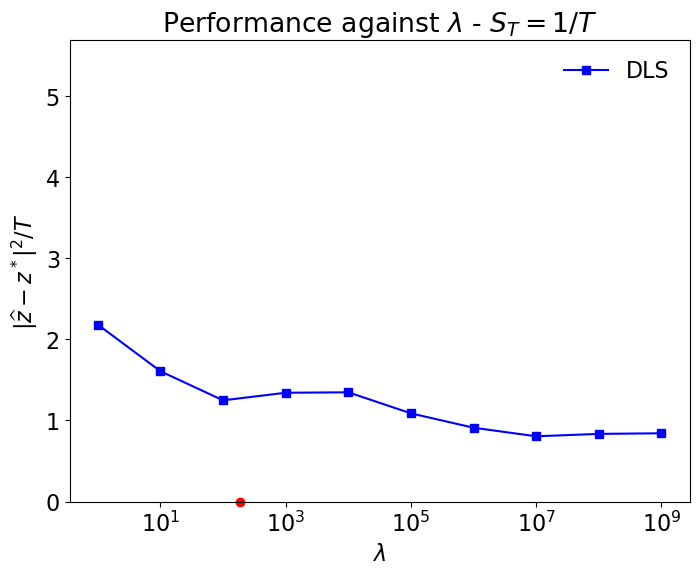

CPU times: user 4min 14s, sys: 8.49 s, total: 4min 22s
Wall time: 1min 5s


In [25]:
%%time

# Performance analysis of the DLS method
MSE_dls,data_dls = perf_dls(N,T,B,alpha,p1,p2,list_lambda)



# Plot
fig, ax = plt.subplots(1, figsize=(8, 6))

ax.plot(list_lambda, MSE_dls ,marker='s',label = "DLS",color='blue')
ax.plot((T/S_T)**(2/3),0,marker = 'o',color='red',clip_on=False) # Value of parameter derived theoretically


ax.set_xticks(list_tau)
ax.set_xscale('log')
ax.set_xlabel(r'$\lambda$')
ax.set_ylabel('$ \|\widehat{z} - z^*\|^2/T$')
ax.set_ylim(0,5.7)
        
# Add a legend, and position it on the lower right (with no box)
plt.legend(loc="upper right", frameon=False)
plt.title('Performance against $\lambda$ - $S_T = 1/T$')
plt.show()

## Performance of the DProj method against $\tau$

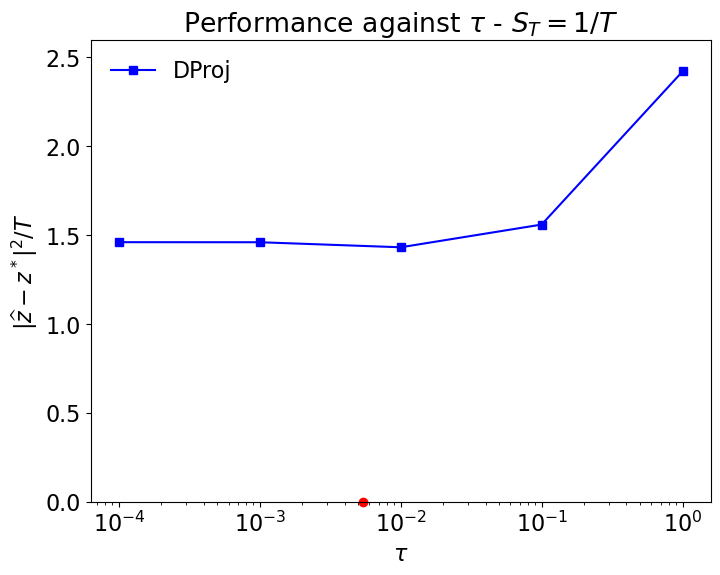

CPU times: user 1min 57s, sys: 2.37 s, total: 1min 59s
Wall time: 15.7 s


In [26]:
%%time

# Performance analysis of the DProj method
MSE_dproj,data_dproj = perf_dproj(N,T,B,alpha,p1,p2,list_tau)

# Plot
fig, ax = plt.subplots(1, figsize=(8, 6))

ax.plot(list_tau, MSE_dproj,marker='s',label = "DProj",color='blue')
ax.plot((S_T/T)**(2/3),0,marker = 'o',color='red',clip_on = False) # Value of parameter derived theoretically


ax.set_xticks(list_tau)
ax.set_xscale('log')
ax.set_xlabel(r'$\tau$')
ax.set_ylabel('$\|\widehat{z} - z^*\|^2/T$')
ax.set_ylim(0,2.6)
        
# Add a legend, and position it on the lower right (with no box)
plt.legend(loc="best", frameon=False)
plt.title(r'Performance against $ \tau $ - $S_T = 1/T$')
plt.show()

# Figure C1 : eigenvalues of $L$ and $L(\lambda)$

This code plots the histogram of eigenvalues of $L$ and $L(\lambda)$ for different values of $\lambda = c_\lambda\left(\frac{T}{S_T}\right)^{2/3}$, for $T = 200$ and $N = 100$. 

In [27]:
from eigenvalues_L_lam import eigs_L_lam

In [28]:
# Parameters

# Toy example
N = 30 # Number of items
T = 50 # Number of time points

## Parameters of the paper (uncomment this section to reproduce the figure of the paper)
#N = 100 # Number of items
#T = 200 # Number of items

# Smoothness S_T = 1/T^{alpha}
alpha = 1

# Connectivity of graphs is chosen randomly between p1/N and p2/N : here we choose a connectivity of log(N)/N for all graphs
p1 = np.log(N)
p2 = np.log(N)

# List of values for c_lambda
list_lambda = [0,1e-2,1e-1,1,10]


We call the function eigs_L_lam to compute the eigenvalues of $L(\lambda)$ for all candidates $\lambda$.

In [29]:
%%time

eigs = eigs_L_lam(N,T,alpha,p1,p2,list_lambda)

CPU times: user 16.7 s, sys: 405 ms, total: 17.1 s
Wall time: 2.38 s


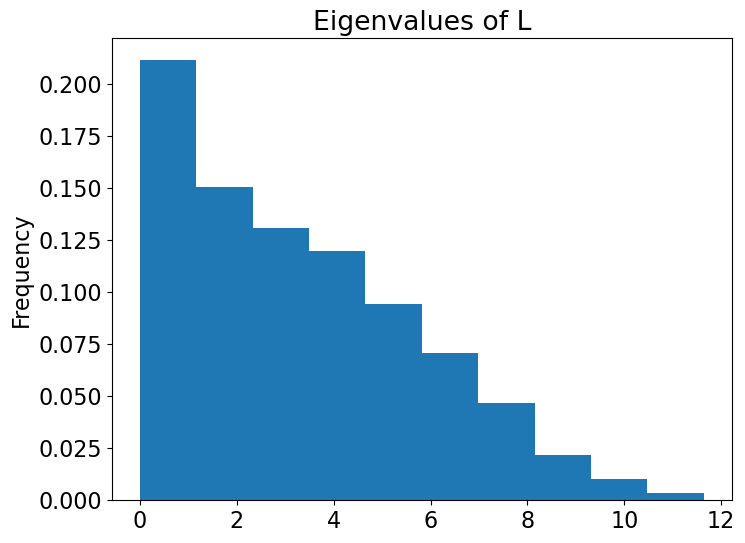

In [30]:
# Plot the eigenvalues of L = L(0)

fig, ax = plt.subplots(figsize=(8,6))

ax.hist(eigs[0,:],density=True)
ax.set_title('Eigenvalues of L')
ax.set_ylabel('Frequency')

plt.show()

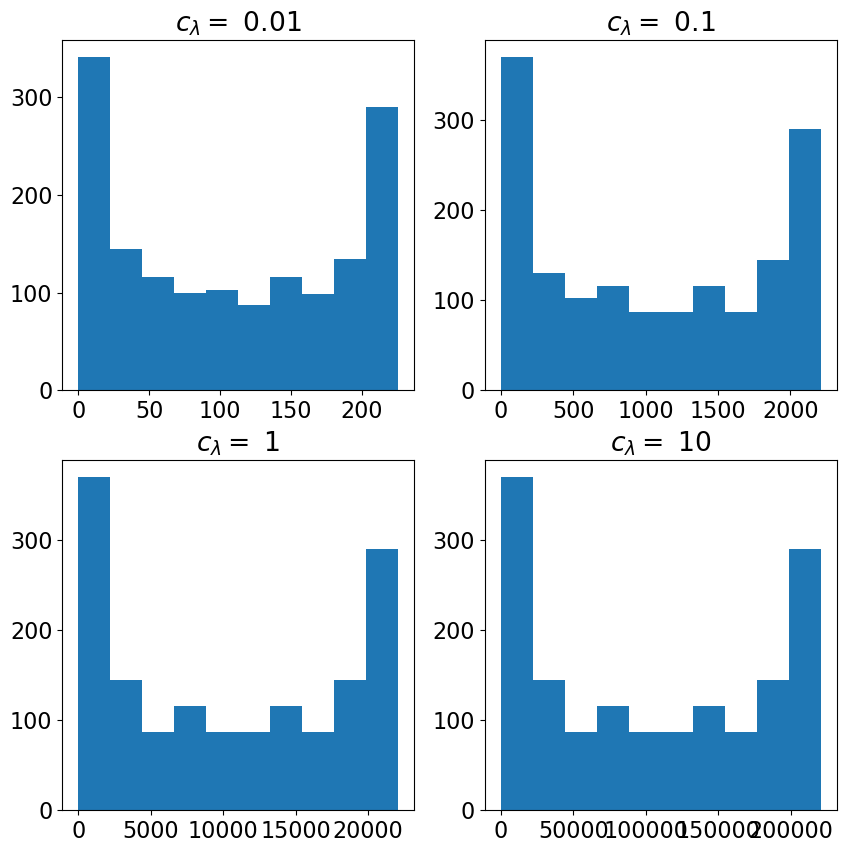

In [31]:
# Plot the eigenvalues of L(lambda)

fig, ((ax0, ax1), (ax2, ax3)) = plt.subplots(nrows=2, ncols=2,figsize=(10,10))

ax0.hist(eigs[1,:])
ax0.set_title('$c_\lambda =$ '+str(list_lambda[1]))

ax1.hist(eigs[2,:])
ax1.set_title('$c_\lambda =$ '+str(list_lambda[2]))

ax2.hist(eigs[3,:])
ax2.set_title('$c_\lambda =$ '+str(list_lambda[3]))

ax3.hist(eigs[4,:])
ax3.set_title('$c_\lambda =$ '+str(list_lambda[4]))

plt.show()

# Figure C2 : Case N >> T

This code plots the MSE versus T for DLS and DProj for $N \gg T$. Here $N = 200$, T goes from 10 to 50 and data is generated according to the Dynamic TranSync model. Graphs are generated as $\mathcal{G}(n, p(t))$ with $p(t)$ chosen randomly between $\frac{1}{n}$ and $\frac{\log(n)}{n}$. The results are averaged over the grid $\mathcal{T}$ as well as 20 Monte Carlo runs.

In [32]:
from transync import transync_analysis

In [41]:
# Parameters

# Toy example
N = 70 # Number of items
list_T = [10,20,30] # Number of time points
B = 5 # Number of Monte Carlo runs

## Parameters of the paper (uncomment this section to reproduce the figure of the paper)
#N = 200 # Number of items
#list_T = [10,20,30,40,50] # Number of time points
#B = 20 # Number of Monte Carlo runs

# Connectivity of graphs is chosen randomly between p1/N and p2/N 
p1 = 1
p2 = np.log(N)

# Estimation method to use
ls_flag = False # Naive Least Squares method
dls_flag = True # Dynamic Least Squares method
dproj_flag = True # Dynamic Projection method

We call the transync_analysis function for different values of $\alpha$, where $S_T = \frac{1}{T^\alpha}$ and plot the results.

## $S_T = \frac{1}{T}$

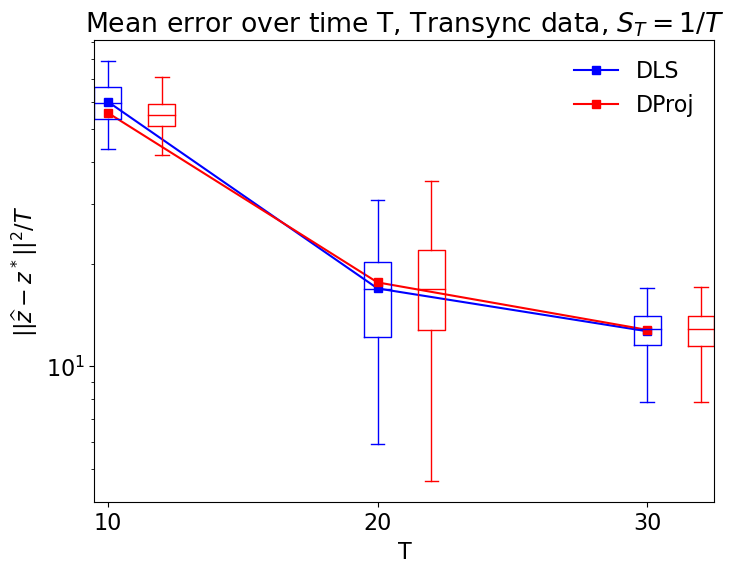

CPU times: user 37.8 s, sys: 1.64 s, total: 39.5 s
Wall time: 17.8 s


In [42]:
%%time

# Analysis with alpha = 1
MSE_ls_1,MSE_dls_1,MSE_dproj_1,data_ls_1,data_dls_1,data_dproj_1 = transync_analysis(N,list_T,B,1,p1,p2,ls_flag,dls_flag,dproj_flag)

# Plot
fig, ax = plt.subplots(1, figsize=(8, 6))

# MSE
ax.plot(list_T, MSE_dls_1,marker='s',label = "DLS",color='blue')
ax.plot(list_T, MSE_dproj_1,marker='s',label = "DProj",color='red')

# Boxplot
box_dls_1 = ax.boxplot(data_dls_1,showfliers=False,positions=[t for t in list_T],widths = 1)
box_dproj_1 = ax.boxplot(data_dproj_1,showfliers=False,positions=[t+2 for t in list_T],widths = 1)

for _, line_list in box_dls_1.items(): 
    for line in line_list: 
        line.set_color('blue') 
        
for _, line_list in box_dproj_1.items(): 
    for line in line_list: 
        line.set_color('red') 

ax.set_xticks(list_T)
ax.set_yscale('log')
ax.set_xlabel('T')
ax.set_ylabel('$\| \|\widehat{z} - z^*\|\|^2/T$')
        
# Add a legend, and position it on the lower right (with no box)
plt.legend(loc="upper right", frameon=False)
plt.title('Mean error over time T, Transync data, $S_T = 1/T$')
plt.show()


## $S_T = \frac{1}{\sqrt{T}}$

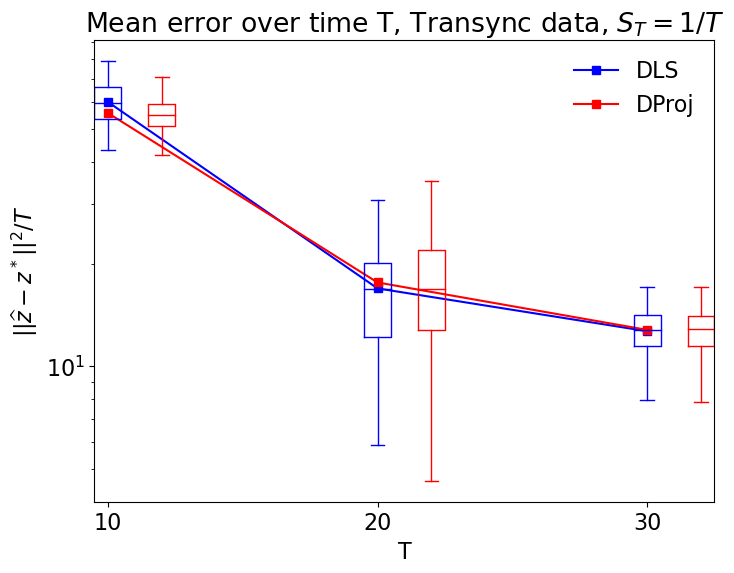

CPU times: user 40.3 s, sys: 991 ms, total: 41.2 s
Wall time: 17.9 s


In [44]:
%%time

# Analysis with alpha = 0.5
MSE_ls_05,MSE_dls_05,MSE_dproj_05,data_ls_05,data_dls_05,data_dproj_05 = transync_analysis(N,list_T,B,0.5,p1,p2,ls_flag,dls_flag,dproj_flag)

# Plot
fig, ax = plt.subplots(1, figsize=(8, 6))

# MSE
ax.plot(list_T, MSE_dls_05,marker='s',label = "DLS",color='blue')
ax.plot(list_T, MSE_dproj_05,marker='s',label = "DProj",color='red')

# Boxplot
box_dls_05 = ax.boxplot(data_dls_05,showfliers=False,positions=[t for t in list_T],widths = 1)
box_dproj_05 = ax.boxplot(data_dproj_05,showfliers=False,positions=[t+2 for t in list_T],widths = 1)

for _, line_list in box_dls_05.items(): 
    for line in line_list: 
        line.set_color('blue') 
        
for _, line_list in box_dproj_05.items(): 
    for line in line_list: 
        line.set_color('red') 

ax.set_xticks(list_T)
ax.set_yscale('log')
ax.set_xlabel('T')
ax.set_ylabel('$\| \|\widehat{z} - z^*\|\|^2/T$')
        
# Add a legend, and position it on the lower right (with no box)
plt.legend(loc="upper right", frameon=False)
plt.title('Mean error over time T, Transync data, $S_T = 1/T$')
plt.show()
